In [9]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(99)
# non-terminal states
N_STATES = 5
nt_states = np.arange(1,N_STATES+1)

# initial state
INITIAL_STATE = 3

# terminal states:0 AND 6
END_STATES = [0, N_STATES+1]


def random_walk(INITIAL_STATE, END_STATES):

    currentState = INITIAL_STATE
    states =[currentState]
    
    while True:
        if np.random.binomial(1,0.5) == 1:
            newState = currentState + 1
        else:
            newState = currentState - 1
        
        currentState = newState
        
        states.append(newState)
        if newState in END_STATES:
            break
    sequence = np.eye(7)[states]    
    return sequence



def gen_training(num_train =100, num_epi = 10):
    total = num_train * num_epi
    training = []
    training_sets = []
    for i in range(total):
        training.append(random_walk(INITIAL_STATE, END_STATES))
    for j in range(0,1000, 10):
        training_sets.append(training[j:j+10])
    
    return training_sets



sets = gen_training(num_train =100, num_epi = 10)
print(len(sets))
print(len(sets[3]))

100
10


In [37]:
class TD_lambda:
    def __init__(self, alpha = 0.05, lamb = 0):
        self.alpha = alpha
        self.lamb = lamb
        self.w = None
        
    def TD_Fig3(self, ten_episodes, ini_weight=0.5):
        self.w = np.full((7,), ini_weight)
        self.w[-1] = 1.
        self.w[0] = 0. 
        
        dw_norm = 1
        while dw_norm > 0.001:
            dw = np.zeros(7)
            for sequence_X in ten_episodes:
                T = len(sequence_X) - 1
                for time in range(1, len(sequence_X)):
                    P_current = np.dot(sequence_X[time], self.w.T)
                    if time == T:
                        P_next = P_current
                    else:
                        P_next = np.dot(sequence_X[time+1], self.w.T)
                    
                    disct_grad = np.zeros(7)
                    for k in range(1, time+1):
                        disct_grad += (self.lamb **(time-k))*sequence_X[k]
                    dw += self.alpha*(P_next-P_current)*disct_grad
            self.w += dw
            dw_norm = np.linalg.norm(dw)
            
    
    def TD_Fig4(self, ten_episodes, ini_weight=0.5):
        self.w = np.full((7,), ini_weight)
        self.w[-1] = 1.
        self.w[0] = 0.
        
        for sequence_X in ten_episodes:
            T = len(sequence_X) - 1
            for time in range(1, len(sequence_X)):
                P_current = np.dot(sequence_X[time], self.w.T)
                if time == T:
                    P_next = P_current
                else:
                    P_next = np.dot(sequence_X[time+1], self.w.T)

                disct_grad = np.zeros(7)
                for k in range(1, time+1):
                    disct_grad += (self.lamb **(time-k))*sequence_X[k]
                self.w += self.alpha*(P_next-P_current)*disct_grad            
    
    

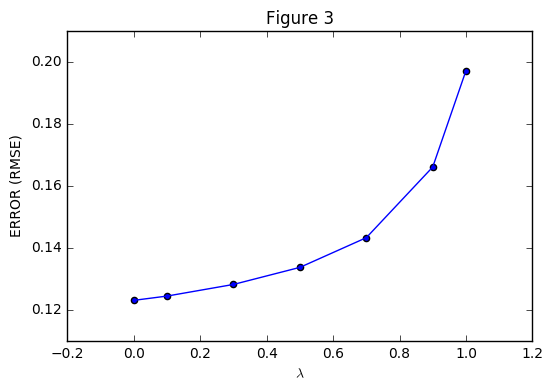

In [39]:
# utilized lambda values for TD(lambda)
td_lambda = np.arange(-0.1, 1., 0.2)
td_lambda[0] = 0
td_lambda = np.append(td_lambda,1.0)

# Ideal value function for non-treminal states
idealStateVal = np.arange(1.,6.)/6.
#print(idealStateVal)

alpha = 0.01
rmse = []
for lamb in td_lambda:
    rmse_lamb = []
    for ten_episodes in sets:
        train = TD_lambda(alpha, lamb)
        train.TD_Fig3(ten_episodes, ini_weight=0.5)
        err2 = (train.w[1:6] - idealStateVal)**2
        rmse_lamb.append(np.sqrt(np.mean(err2)))
    rmse.append(np.mean(rmse_lamb))

    
%matplotlib inline

plt.plot(td_lambda, rmse)
plt.scatter(td_lambda,rmse)
plt.title("Figure 3")
plt.xlabel("$\lambda$")
plt.ylabel("ERROR (RMSE)")
plt.show()

    
        
    

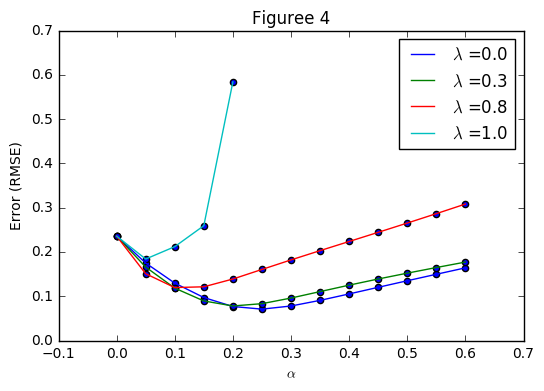

In [90]:
alpha_fig4 = np.arange(0.,0.65, 0.05)
lamb_fig4 = np.array([0,0.3,0.8,1.])

rmse = []
for lamb in lamb_fig4:
    rmse_lamb = []
    for alpha in alpha_fig4:
        rmse_alpha = []
        for ten_episodes in sets:
            train = TD_lambda(alpha, lamb)
            train.TD_Fig4(ten_episodes, ini_weight=0.5)
            err2 = (train.w[1:6] - idealStateVal)**2
            rmse_alpha.append(np.sqrt(np.mean(err2)))
        rmse_lamb.append(np.mean(rmse_alpha))
    rmse.append(rmse_lamb)
    
rmse = np.asarray(rmse)
plt.figure()
for i in range(len(rmse)):
    p = np.asarray(rmse[i])
    p[p>0.7] = np.nan
    plt.plot(alpha_fig4, p)
    plt.scatter(alpha_fig4, p)
plt.xlabel(r'$\alpha$')
plt.ylabel("Error (RMSE)")
plt.title("Figuree 4")
multi_legend= ['$\lambda$ =' + str(lamb) for lamb in lamb_fig4]
plt.legend(multi_legend)
plt.show()
    

In [77]:
len(alpha_fig4)

13

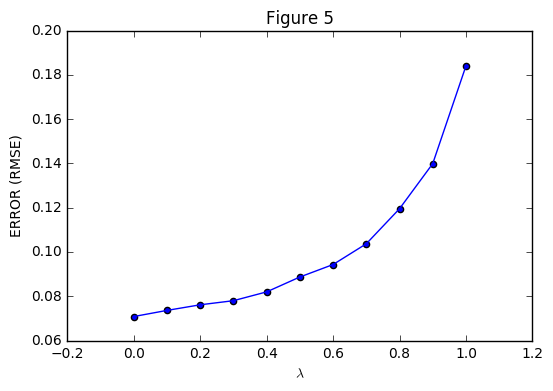

In [104]:
lamb_fig5 = np.arange(0,1.1, 0.1)

alpha_fig5 = alpha_fig4

opt_alpha = []
for lamb in lamb_fig5:
    rmse_lamb=[]
    for alpha in alpha_fig5:
        rmse_alpha = []
        for ten_episodes in sets:
            train = TD_lambda(alpha, lamb)
            train.TD_Fig4(ten_episodes, ini_weight=0.5)
            err2 = (train.w[1:6] - idealStateVal)**2
            rmse_alpha.append(np.sqrt(np.mean(err2)))
        rmse_lamb.append(np.mean(rmse_alpha))
    opt_alpha.append(alpha_fig4[np.argmin(rmse_lamb)])
    
rmse = []
for i in range(len(lamb_fig5)):
    rmse_al = []
    alpha = opt_alpha[i]
    lamb = lamb_fig5[i]
    for ten_episodes in sets:
        train = TD_lambda(alpha, lamb)
        train.TD_Fig4(ten_episodes, ini_weight=0.5)
        err2 = (train.w[1:6] - idealStateVal)**2
        rmse_al.append(np.sqrt(np.mean(err2)))
    rmse.append(np.mean(rmse_al))
        
plt.plot(lamb_fig5, rmse)
plt.scatter(lamb_fig5,rmse)
plt.title("Figure 5")
plt.xlabel("$\lambda$")
plt.ylabel("ERROR (RMSE)")
plt.show()        

In [103]:
opt_alpha
alpha_fig5

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ])

In [102]:
rmse_lamb

[0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584,
 0.23570226039551584]

In [63]:
a =np.asarray(rmse)
a

array([ [0.23570226039551584, 0.1749581792329426, 0.12959470370859436, 0.097015484005414779, 0.076752758562868714, 0.070821864354974964, 0.07791460984995241, 0.090623967212993164, 0.10516121500960822, 0.12008694329166197, 0.13491054638993322, 0.14953145924620326, 0.16402256596986667],
       nan,
       [0.23570226039551584, 0.15078756932340798, 0.11950648418372196, 0.12127205874693525, 0.13881606209733927, 0.16045089808203308, 0.18198571590510249, 0.2029200086261353, 0.22357334756505587, 0.24425794210793367, 0.2651645522978871, 0.28641002484639944, 0.30810347664180454],
       [0.23570226039551584, 0.18398055312459971, 0.21187994010645905, 0.25926054431608642, 0.58394174492047279, 75.302135173009248, 39588.521724961967, 83671152.092383057, 78295241248.603424, 40150757073750.656, 10635312467542320.0, 1.5652164465395702e+18, 1.4094272979926308e+20]], dtype=object)

In [60]:
rmse[rmse>0.7]=np.nan

In [67]:
b=a[3]
b[b>0.7] = np.nan

In [69]:
b>0.7

True

In [70]:
a

array([ [0.23570226039551584, 0.1749581792329426, 0.12959470370859436, 0.097015484005414779, 0.076752758562868714, 0.070821864354974964, 0.07791460984995241, 0.090623967212993164, 0.10516121500960822, 0.12008694329166197, 0.13491054638993322, 0.14953145924620326, 0.16402256596986667],
       nan,
       [0.23570226039551584, 0.15078756932340798, 0.11950648418372196, 0.12127205874693525, 0.13881606209733927, 0.16045089808203308, 0.18198571590510249, 0.2029200086261353, 0.22357334756505587, 0.24425794210793367, 0.2651645522978871, 0.28641002484639944, 0.30810347664180454],
       [0.23570226039551584, nan, 0.21187994010645905, 0.25926054431608642, 0.58394174492047279, 75.302135173009248, 39588.521724961967, 83671152.092383057, 78295241248.603424, 40150757073750.656, 10635312467542320.0, 1.5652164465395702e+18, 1.4094272979926308e+20]], dtype=object)

In [71]:
b=np.asarray(rmse[3])

In [72]:
b

array([  2.35702260e-01,              nan,   2.11879940e-01,
         2.59260544e-01,   5.83941745e-01,   7.53021352e+01,
         3.95885217e+04,   8.36711521e+07,   7.82952412e+10,
         4.01507571e+13,   1.06353125e+16,   1.56521645e+18,
         1.40942730e+20])

In [73]:
b>0.7

/home/james/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

In [74]:
np.asarray(rmse).T

array([ [0.23570226039551584, 0.1749581792329426, 0.12959470370859436, 0.097015484005414779, 0.076752758562868714, 0.070821864354974964, 0.07791460984995241, 0.090623967212993164, 0.10516121500960822, 0.12008694329166197, 0.13491054638993322, 0.14953145924620326, 0.16402256596986667],
       nan,
       [0.23570226039551584, 0.15078756932340798, 0.11950648418372196, 0.12127205874693525, 0.13881606209733927, 0.16045089808203308, 0.18198571590510249, 0.2029200086261353, 0.22357334756505587, 0.24425794210793367, 0.2651645522978871, 0.28641002484639944, 0.30810347664180454],
       [0.23570226039551584, nan, 0.21187994010645905, 0.25926054431608642, 0.58394174492047279, 75.302135173009248, 39588.521724961967, 83671152.092383057, 78295241248.603424, 40150757073750.656, 10635312467542320.0, 1.5652164465395702e+18, 1.4094272979926308e+20]], dtype=object)

In [94]:
0**0

1

In [95]:
0**1

0